In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt


# web-scraping
import requests
from bs4 import BeautifulSoup
import html5lib
import PyPDF2 # Scraping PDFs

# misc
import country_converter as coco
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)
files

['.DS_Store', 'example.py', '.ipynb_checkpoints', 'project_data.ipynb']

### Import CoronaNet policy data set 

In [4]:
# read in the CoronaNet data
dat = pd.read_csv("../Data/coronanet_release.csv", encoding = "ISO-8859-1")
# drop unuseful columns
dat = dat.drop(['Unnamed: 0','record_id', "link"], axis=1)
print(dat.shape)

# check out all of the columns names and data types in the dataset
print(dat.dtypes)
# check out 5 random rows of the data
dat.sample(5)

(45391, 37)
policy_id               int64
entry_type             object
correct_type           object
update_type            object
update_level           object
description            object
date_announced         object
date_start             object
date_end               object
country                object
ISO_A3                 object
ISO_A2                 object
init_country_level     object
domestic_policy         int64
province               object
city                   object
type                   object
type_sub_cat           object
type_text              object
institution_status     object
target_country         object
target_geog_level      object
target_region          object
target_province        object
target_city            object
target_other          float64
target_who_what        object
target_direction       object
travel_mechanism       object
compliance             object
enforcer               object
index_high_est        float64
index_med_est         float6

,policy_id,entry_type,correct_type,update_type,update_level,description,date_announced,date_start,date_end,country,...,target_direction,travel_mechanism,compliance,enforcer,index_high_est,index_med_est,index_low_est,index_country_rank,date_updated,recorded_date
15926,2861937,update,original,Change of Policy,Strengthening,"In India's West Bengal state, Kolkata airport ...",2020-08-11,2020-08-11,2020-08-31,India,...,NaN,NaN,Mandatory (Unspecified/Implied),"Provincial/State Government,Police,Other (Plea...",NaN,NaN,NaN,NaN,2020-08-18,2020-08-18 18:00:47
14614,3330789,update,original,Change of Policy,Strengthening,"On May 14, Guatemala announces a complete week...",2020-05-14,2020-05-14,2020-05-25,Guatemala,...,NaN,NaN,"Mandatory (Unspecified/Implied),Mandatory with...","National Government,Police",NaN,NaN,NaN,NaN,2020-05-22,2020-05-22 16:01:47
11196,7790099,new_entry,original,NaN,NaN,"From March 9, 2020, in the region of Oise and ...",2020-03-07,2020-03-09,NaN,France,...,NaN,NaN,Mandatory (Unspecified/Implied),"National Government,Ministry/Department of Hea...",52.183531,50.447251,48.697151,117.0,2020-04-02,2020-04-02 18:29:30
7441,3195580,new_entry,original,NaN,NaN,"Canada, PEI is opening a new testing site for ...",2020-07-10,2020-07-13,NaN,Canada,...,NaN,NaN,Voluntary/Recommended but No Penalties,Provincial/State Government,NaN,NaN,NaN,NaN,2020-08-04,2020-08-04 05:05:51
738,2345213,new_entry,original,NaN,NaN,"In Algeria, the Minister of Trade have announc...",2020-06-29,2020-06-29,NaN,Algeria,...,NaN,NaN,"Mandatory with Fines,Mandatory (Other; please ...","National Government,Police,Other (Please speci...",NaN,NaN,NaN,NaN,2020-07-06,2020-07-06 19:21:26


In [5]:
# only look at OECD data
oecd = ["AUSTRALIA","AUSTRIA","BELGIUM","CANADA","CHILE","COLOMBIA","CZECH REPUBLIC",
        "DENMARK","ESTONIA","FINLAND","FRANCE","GERMANY","GREECE","HUNGARY","ICELAND",
        "IRELAND","ISRAEL","ITALY","JAPAN","KOREA","LATVIA","LITHUANIA","LUXEMBOURG",
        "MEXICO","NETHERLANDS","NEW ZEALAND","NORWAY","POLAND","PORTUGAL","SLOVAK REPUBLIC",
        "SLOVENIA","SPAIN","SWEDEN","SWITZERLAND", "TURKEY", "UNITED KINGDOM", "UNITED STATES"]
# count how many oecd countries are there
print(len(oecd))
# standardize the country names
oecd = coco.convert(names=[x for x in oecd], to='name_short')

37


In [6]:
# Question: include EU policies to member states or not??
dat_eu = dat[dat.country == "European Union"]
dat_eu.sample(3)

,policy_id,entry_type,correct_type,update_type,update_level,description,date_announced,date_start,date_end,country,...,target_direction,travel_mechanism,compliance,enforcer,index_high_est,index_med_est,index_low_est,index_country_rank,date_updated,recorded_date
10851,7561179,new_entry,original,NaN,NaN,"On 3 April, the Commission approved requests f...",2020-04-03,2020-04-03,2020-10-03,European Union,...,Inbound,Not Applicable,Mandatory (Unspecified/Implied),National Government,51.729525,50.509550,49.282876,30.0,2020-04-27,2020-04-27 09:43:58
10875,5494096,new_entry,original,NaN,NaN,Ivory Coast is receiving FCFA 629 million in h...,2020-08-28,2020-08-28,NaN,European Union,...,NaN,Not Applicable,Voluntary/Recommended but No Penalties,"National Government,Ministry/Department of Health",NaN,NaN,NaN,NaN,2020-09-08,2020-09-08 12:09:03
10846,4988254,new_entry,correction,NaN,NaN,"In a summit meeting on 26 March, the European ...",2020-03-26,2020-03-26,NaN,European Union,...,Inbound/Outbound,NaN,Voluntary/Recommended but No Penalties,National Government,51.305300,49.947693,48.127501,30.0,2020-08-06,2020-08-06 10:05:48


In [7]:
# delete all EU observations
dat_noeu = dat[dat.country != "European Union"]
# standardize country names
dat_noeu["country"] = coco.convert(names=[x for x in dat_noeu["country"]], to='name_short')

In [8]:
# OECD country data
dat_oecd = dat_noeu[dat_noeu['country'].isin(oecd)]
# check if all 37 oecd countries are included in the data set -- Yes!
print (len(dat_oecd.country.unique()))
# check it out
print(dat_oecd.shape)
dat_oecd.sample(5)

37
(17837, 37)


,policy_id,entry_type,correct_type,update_type,update_level,description,date_announced,date_start,date_end,country,...,target_direction,travel_mechanism,compliance,enforcer,index_high_est,index_med_est,index_low_est,index_country_rank,date_updated,recorded_date
41246,5088134,new_entry,original,NaN,NaN,"Delaware, United States\nWILMINGTON, Del.  Go...",2020-04-22,2020-04-22,NaN,United States,...,NaN,NaN,Voluntary/Recommended but No Penalties,"Provincial/State Government,Other (Please spec...",53.258027,52.279138,51.509904,62.0,2020-04-30,2020-04-30 11:57:15
42068,4818187,new_entry,original,NaN,NaN,"On Jan 24, NY Governor Cuomo has directed the ...",2020-01-24,2020-01-24,NaN,United States,...,NaN,NaN,Mandatory (Unspecified/Implied),"Provincial/State Government,Other (Please spec...",49.994883,49.063825,47.940723,188.0,2020-04-23,2020-04-23 13:39:24
36399,6720345,new_entry,original,NaN,NaN,"In Switzerland, the canton of Aargau let espec...",2020-05-04,2020-05-04,NaN,Switzerland,...,NaN,NaN,Voluntary/Recommended but No Penalties,Provincial/State Government,NaN,NaN,NaN,NaN,2020-07-26,2020-07-26 18:11:11
42948,8819110,update,original,End of Policy,NaN,"United States, Arkansas Governor issues an exe...",2020-04-04,2020-04-06,2020-05-06,United States,...,NaN,NaN,"Mandatory with Legal Penalties (Jail Time),Man...","Provincial/State Government,Municipal Governme...",52.916671,52.048215,51.382515,61.0,2020-07-02,2020-07-02 15:36:39
11370,7968790,new_entry,correction,NaN,NaN,"Effective June 8, all travelers arriving by an...",2020-05-22,2020-06-08,2020-06-15,France,...,Inbound,All kinds of transport,Voluntary/Recommended but No Penalties,"National Government,Ministry/Department of For...",NaN,NaN,NaN,NaN,2020-10-22,2020-10-22 01:15:38


### Import Quarterly Economic data for OECD countries

In [18]:
# read in the Quarterly National econ data
gdp_percap = pd.read_csv("../Data/GDPpercapita.csv", encoding = "ISO-8859-1")
# drop unuseful columns
gdp_percap = gdp_percap.filter(items=['Country', 'Value', 'Period']).rename(columns={"Value": "GDP_per_capita"})

# standardize country names
gdp_percap["Country"] = coco.convert(names=[x for x in gdp_percap["Country"]], to='name_short')
# check out all of the columns names and data types in the dataset
print(gdp_percap.dtypes)
# check out 5 random rows of the data
gdp_percap.head(5) 

Country            object
GDP_per_capita    float64
Period             object
dtype: object


,Country,GDP_per_capita,Period
0,Australia,50719.7,Q4-2017
1,Australia,51371.0,Q1-2018
2,Australia,52211.9,Q2-2018
3,Australia,52561.7,Q3-2018
4,Australia,53023.0,Q4-2018


In [116]:
# Quarterly Growth Rates of real GDP, change over same quarter, previous year
gdp_change = pd.read_csv("../Data/QGDP_change_year_quarter.csv", encoding = "ISO-8859-1")
# drop unuseful columns
gdp_change = gdp_change.filter(items=['Country','Measure','Value','Period'])

# standardize country names
gdp_change["Country"] = coco.convert(names=[x for x in gdp_change["Country"]], to='name_short')
# check out 5 random rows of the data
gdp_change["Country"] = gdp_change["Country"].astype(str)
gdp_change["Period"] = gdp_change["Period"].astype(str)

gdp_change.dtypes 

Country     object
Measure     object
Value      float64
Period      object
dtype: object

In [128]:
# find different types of GDP measurements
print(gdp_change.Measure.unique())

# split the two measurements into two dataframe
gdp_change_year = gdp_change[gdp_change.Measure == 'Growth rate compared to previous quarter, seasonally adjusted']
QQcompare = ['Growth rate compared to the same quarter of previous year, seasonally adjusted',
             'Contributions to Q-o-Q GDP growth, seasonally adjusted']
gdp_change_quarter = gdp_change[gdp_change['Measure'].isin(QQcompare)]

# change column name into the specific measure
gdp_change_year = gdp_change_year.rename(columns={"Value": "GDP_growth_rate_change_year"}).drop(['Measure'], axis=1)
gdp_change_year['Country'] = gdp_change_year['Country'].astype("str")
gdp_change_year['Period'] = gdp_change_year['Period'].astype("str")

# similarly
gdp_change_quarter = gdp_change_quarter.rename(columns={"Value": "GDP_growth_rate_change_quart"}).drop(['Measure'], axis=1)
gdp_change_quarter['Country'] = gdp_change_quarter['Country'].astype("str")
gdp_change_quarter['Period'] = gdp_change_quarter['Period'].astype("str")
gdp_change_year.dtypes

['Growth rate compared to previous quarter, seasonally adjusted'
 'Growth rate compared to the same quarter of previous year, seasonally adjusted'
 'Contributions to Q-o-Q GDP growth, seasonally adjusted']


Country                         object
GDP_growth_rate_change_year    float64
Period                          object
dtype: object

In [131]:
# merge????
gdp_change_quartyear = pd.merge(gdp_change_quarter,gdp_change_year, how='left', on=['Country', 'Period'])
gdp_change_quartyear

,Country,GDP_growth_rate_change_quart,Period,GDP_growth_rate_change_year
0,Australia,2.558758,Q3-2018,0.242387
1,Australia,2.558758,Q3-2018,0.339775
2,Australia,2.558758,Q3-2018,1.230053
3,Australia,2.558758,Q3-2018,-0.079257
4,Australia,2.558758,Q3-2018,0.907563
...,...,...,...,...
14126,South Korea,-4.100000,Q2-2020,1.479303
14127,South Korea,-4.100000,Q2-2020,1.098880
14128,South Korea,-4.100000,Q2-2020,-0.370695
14129,South Korea,-4.100000,Q2-2020,-16.083296


In [130]:
gdp_change_quartyear = pd.concat([gdp_change_quarter, gdp_change_year],axis=1, ignore_index=True)
gdp_change_quartyear


,0,1,2,3,4,5
0,NaN,NaN,NaN,Australia,0.242387,Q3-2018
1,NaN,NaN,NaN,Australia,0.105242,Q4-2018
2,NaN,NaN,NaN,Australia,0.443936,Q1-2019
3,NaN,NaN,NaN,Australia,0.758093,Q2-2019
4,NaN,NaN,NaN,Australia,0.505938,Q3-2019
...,...,...,...,...,...,...
4244,South Korea,-0.3,Q2-2019,NaN,NaN,NaN
4245,South Korea,1.4,Q3-2019,NaN,NaN,NaN
4246,South Korea,0.1,Q4-2019,NaN,NaN,NaN
4247,South Korea,0.7,Q1-2020,NaN,NaN,NaN


### Import Covid-19 global time series data

### Scraping 2019 GHS index, and aggregated Covid-19 data as of Nov 30, 2020

In [9]:
url2="https://www.ghsindex.org/#l-section--map"
ghs = requests.get(url2)
# check connection to page
ghs.status_code
# downloaded the entire website and parse the content with beautifulsoup
ghs.content
soup = BeautifulSoup(ghs.content, 'html.parser')

__But the website has many deeply nested tables that beautifulsoup failed to scrape.__ 

In [10]:
# store and get the url that we'll scrape.
url="https://coronavirus.jhu.edu/data/mortality"
covid_mort = requests.get(url)
# check connection to page
covid_mort.status_code

200

In [12]:
# extract the country BIT table from the webpage 
table = pd.read_html(covid_mort.text)
# save the table (dtype: list) as a dataframe
covidedat = table[0]
# standardize country names
covidedat["Country"] = coco.convert(names=[x for x in covidedat["Country"]], to='name_short')
# OECD country data
coviddat_oecd = covidedat[covidedat['Country'].isin(oecd)]
coviddat_oecd.head()

,Country,Confirmed,Deaths,Case-Fatality,Deaths/100K pop.
0,Belgium,576599,16547,2.9%,144.87
4,Spain,1628208,44668,2.7%,95.60
5,Italy,1585178,54904,3.5%,90.85
6,United Kingdom,1621305,58342,3.6%,87.75
8,Mexico,1107071,105655,9.5%,83.73


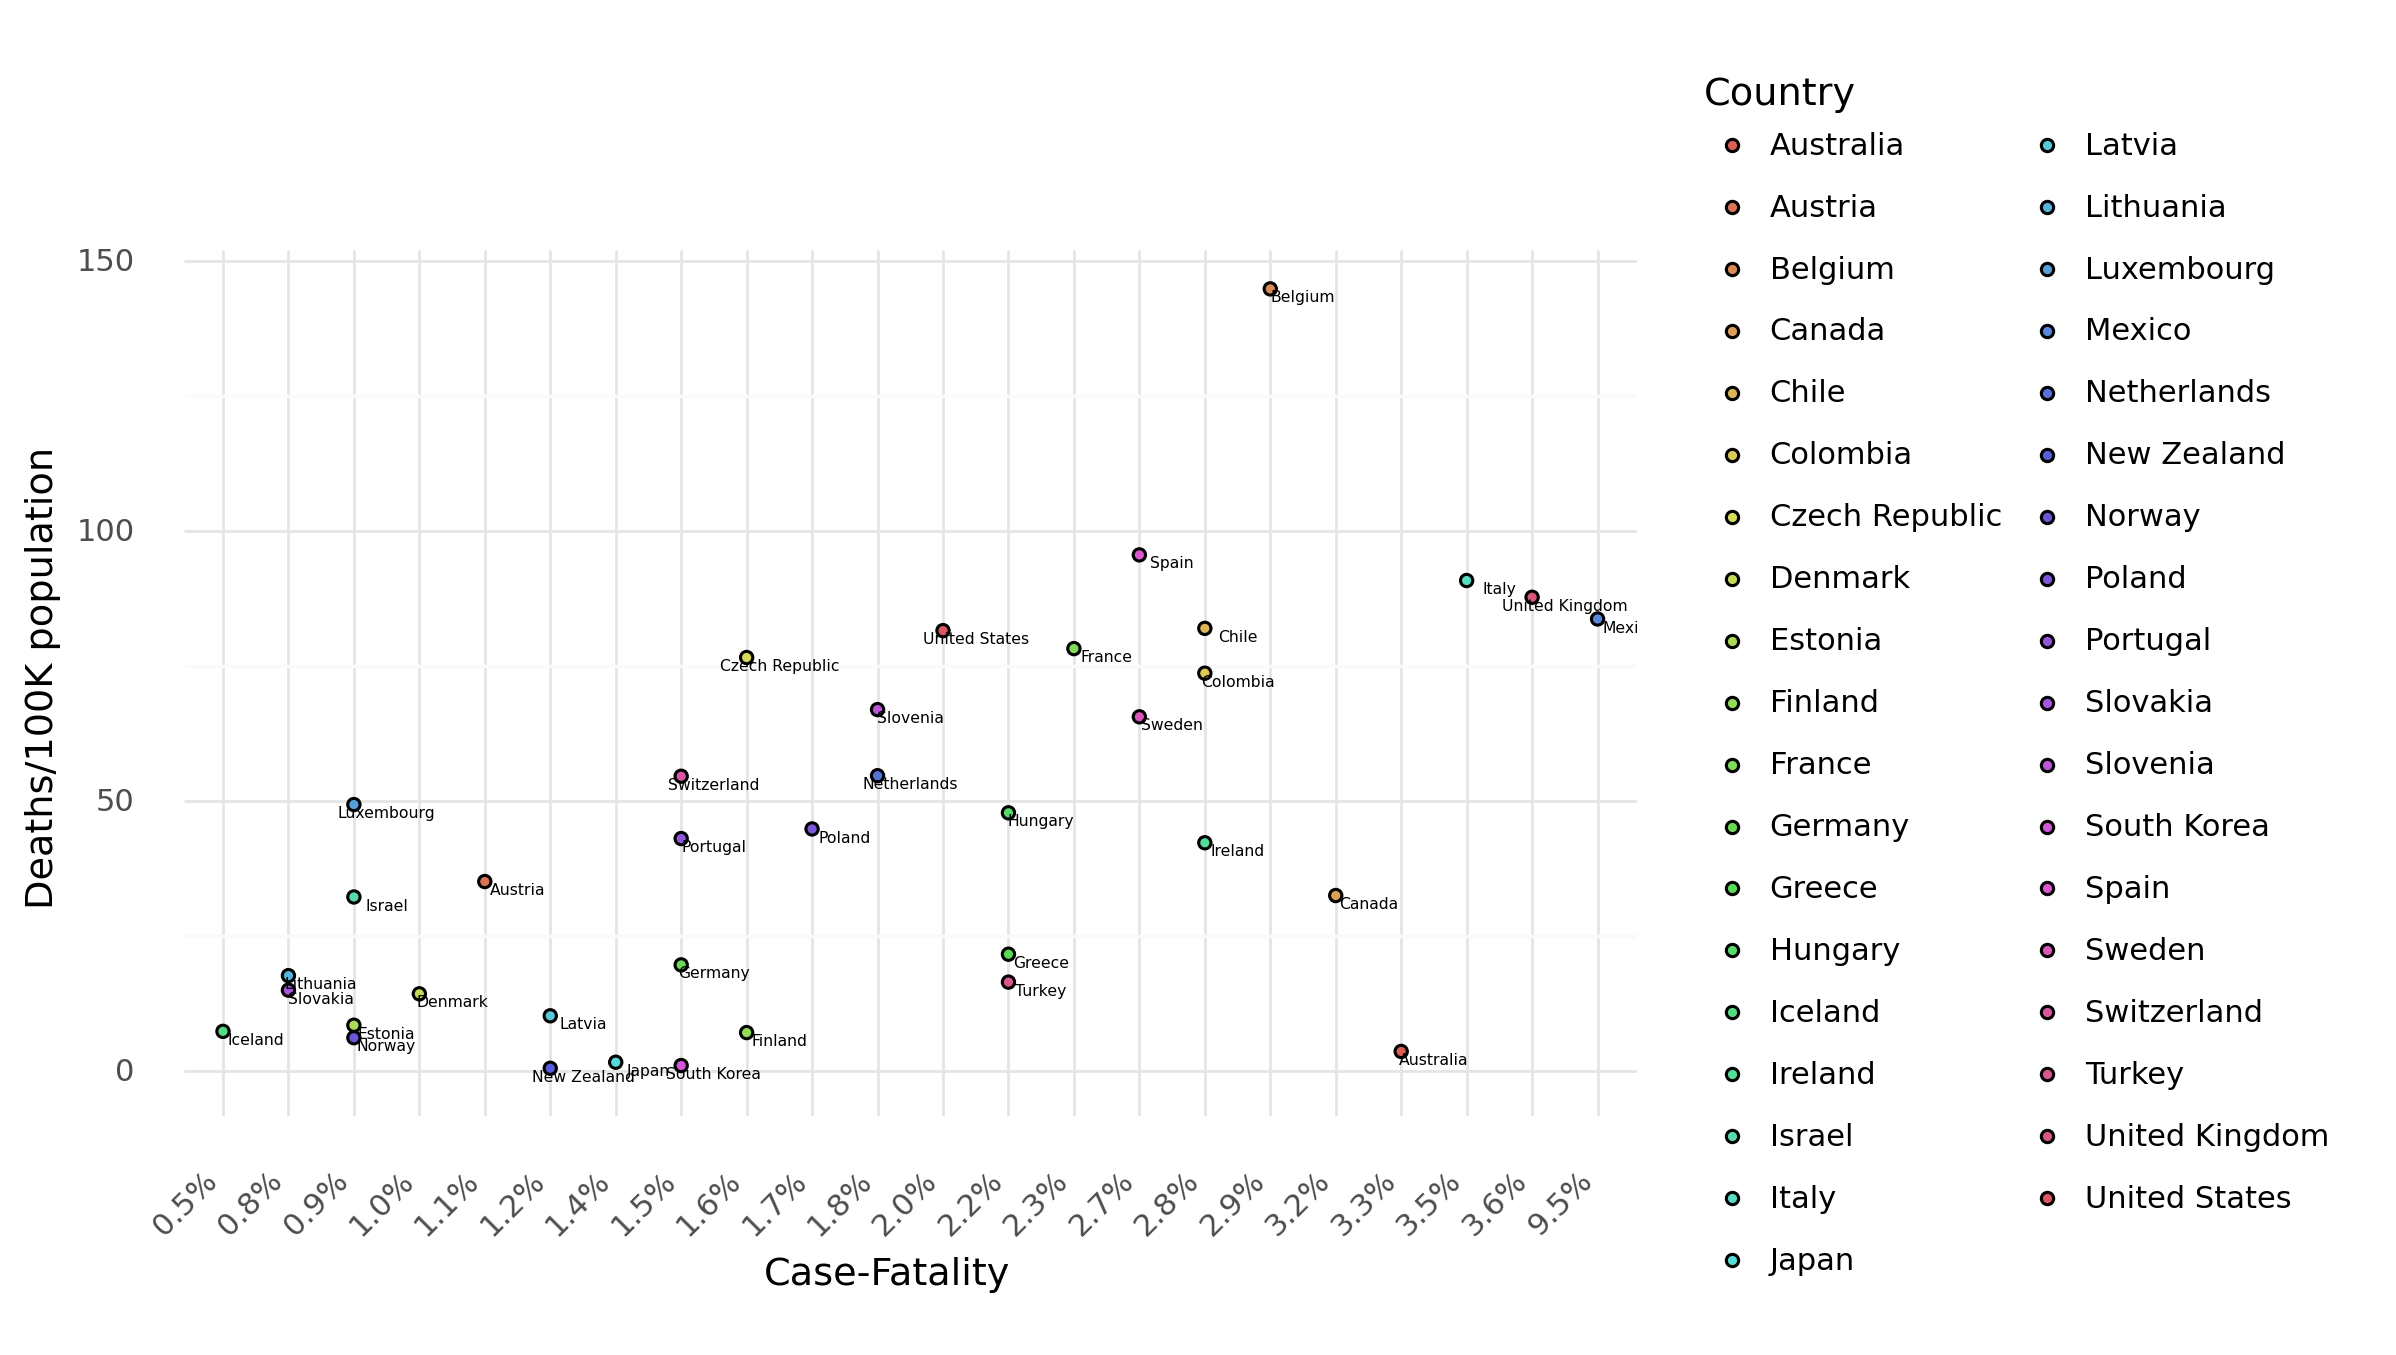

<ggplot: (313011450)>

In [13]:
(
    ggplot(coviddat_oecd,
          aes(x="Case-Fatality",y="Deaths/100K pop.", fill="Country")) +
    geom_point() +
    geom_text(aes(label='Country'), size=4.5, position = position_nudge(x=0.5, y =-1.5))+
    labs(x="Case-Fatality",y="Deaths/100K population") +
    theme_minimal() +
    theme(dpi=250, figure_size=(7.5,4.5), axis_text_x=element_text(rotation=45, hjust=1))
)


In [33]:
# read in the CoronaNet data
ghs = pd.read_csv("../Data/GHS.csv", encoding = "ISO-8859-1")
# drop unuseful columns
ghs = ghs.drop(['Rank','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1)
ghs = (ghs.rename(columns={ghs.columns[0]:"rank"})
            .drop(ghs.tail(4).index)) # drop last n rows
print(ghs.shape)

ghs['rank'] = ghs['rank'].map(lambda x: x.lstrip('=')).astype(int)
# check out all of the columns names and data types in the dataset
print(ghs.dtypes)

# standardize country names
ghs["Country"] = coco.convert(names=[x for x in ghs["Country"]], to='name_short')
# OECD country data
ghs_oecd = ghs[ghs['Country'].isin(oecd)]

# check out 5 random rows of the data
ghs_oecd.sample(5)

(195, 3)
rank             int64
Country         object
Score / 100    float64
dtype: object


SÃ£o TomÃ© and PrÃ­ncipe not found in regex


,rank,Country,Score / 100
15,16,Norway,64.6
1,2,United Kingdom,77.9
11,12,Slovenia,67.2
66,67,Luxembourg,43.8
0,1,United States,83.5


### Predictive Model for Covid-19 Cases: Country-Day

SyntaxError: invalid syntax (<ipython-input-192-59450b907f95>, line 3)

### Predictive Model for Change in Unemployment Rate: Country-Quarter